In [83]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [33]:
df=pd.read_csv("all_data.csv");
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [34]:
df.rename(columns={"Life expectancy at birth (years)":"Life_expectancy"},inplace=True);
df.head()

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


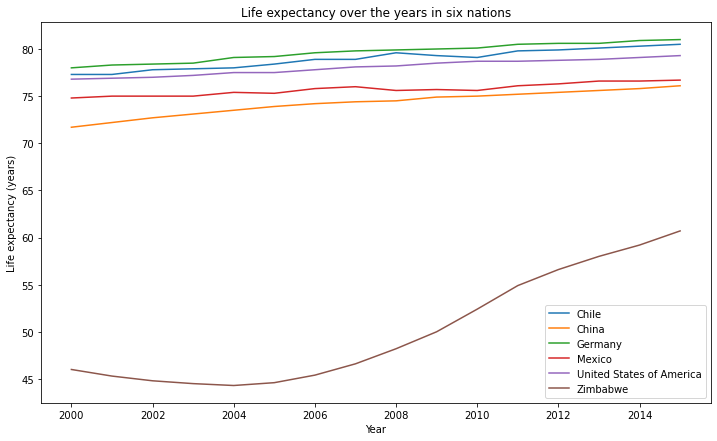

In [68]:
#Has life expectancy increased over time in the six nations?
countries=df["Country"].unique();
fig=plt.figure(figsize=(12,7));
ax=plt.subplot();
for country in countries:    
    years=df[df["Country"] == country]["Year"];
    life_expectancy=df[df["Country"] == country]["Life_expectancy"];
    plt.plot(years,life_expectancy);
#print(legend);
ax.legend(countries);
plt.xlabel("Year");
plt.ylabel("Life expectancy (years)");
plt.title("Life expectancy over the years in six nations");
plt.show();

From the last figure we can see that life expectancy in all six nations has increased over the years. Zimbabwe demostrated the highest increase in life expectancy.

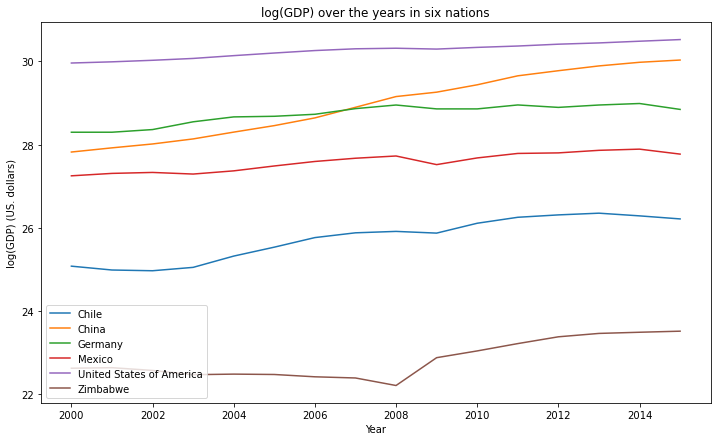

In [69]:
#Has life expectancy increased over time in the six nations?
fig=plt.figure(figsize=(12,7));
ax=plt.subplot();
for country in countries:    
    years=df[df["Country"] == country]["Year"];
    gdp=df[df["Country"] == country]["GDP"];
    gdp_log=np.log(gdp);
    plt.plot(years,gdp_log);
#print(legend);
ax.legend(countries,loc=3);
plt.xlabel("Year");
plt.ylabel("log(GDP) (US. dollars)");
plt.title("log(GDP) over the years in six nations");
plt.show();

Every country demostrated absolute GDP groth over the years

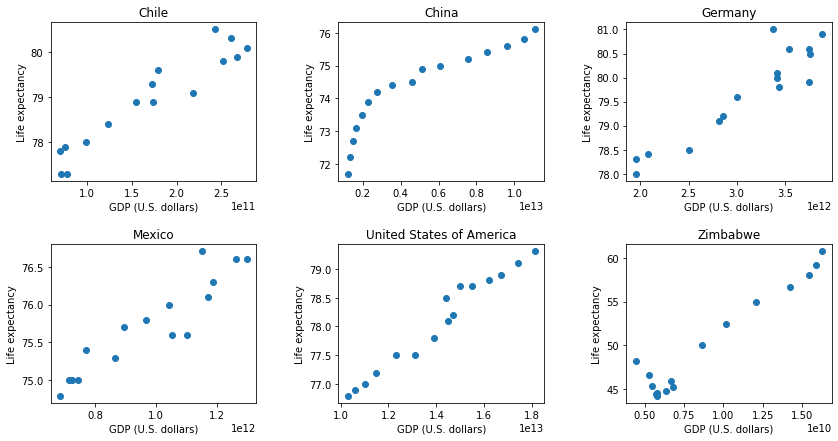

In [119]:
#Is there a correlation between GDP and life expectancy of a country?
plt.figure(figsize=(14,7))
for i in range(len(countries)):
    country=countries[i];    
    data=df[df["Country"] == country];    
    plt.subplot(2,3,i+1);
    plt.scatter(data["GDP"],data["Life_expectancy"]);
    plt.title(country);    
    plt.xlabel("GDP (U.S. dollars)");
    plt.ylabel("Life expectancy");
plt.subplots_adjust(hspace=0.4,wspace=0.4);
plt.show();

All countries shows positive correlation between groth of GDP and life expectancy. Correlation seems to be linear for all presented countries except China

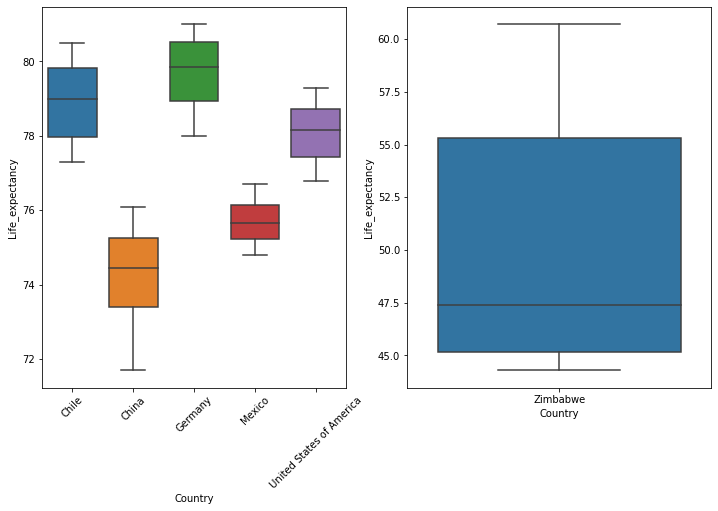

In [139]:
#What is the average life expectancy in these nations?
plt.figure(figsize=(12,7))
ax=plt.subplot(1,2,1);
sns.boxplot(x="Country",y="Life_expectancy",data=df[df["Country"] != "Zimbabwe"]);
#sns.boxplot(x="Country",y="Life_expectancy",data=df);
plt.xticks(rotation=45);
plt.subplot(1,2,2);
sns.boxplot(x="Country",y="Life_expectancy",data=df[df["Country"] == "Zimbabwe"]);
plt.show();

Median life expectancy in Zimbabwe is grealy lower then in the other presented countries, so it is shown in the another plot

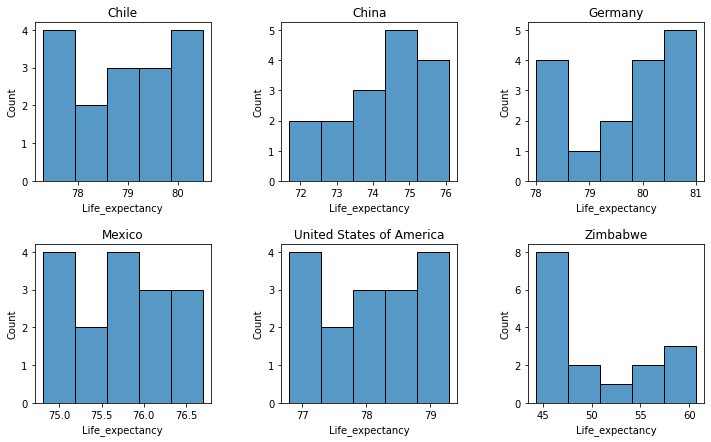

In [134]:
#What is the distribution of that life expectancy?
plt.figure(figsize=(12,7))
for i in range(len(countries)):
    country=countries[i];
    plt.subplot(2,3,i+1);
    #plt.hist(df[df["Country"] == country]["Life_expectancy"]);
    sns.histplot(df[df["Country"] == country]["Life_expectancy"]);
    plt.title(country);
plt.subplots_adjust(hspace=0.4,wspace=0.4);    
plt.show();